In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import tqdm
import spacepy.toolbox as tb

%matplotlib inline

In [2]:
# http://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-UR-93-1179

* Shots are fired isotropically from a point and hit a position sensitive detector
* There is no scattering
* y is fixed to be 1 away

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -0.17966: 100%|██████████| 200000/200000 [00:11<00:00, 17534.23it/s]
Finished [100%]: Average ELBO = -0.18735
100%|██████████| 20000/20000 [00:08<00:00, 2278.71it/s]


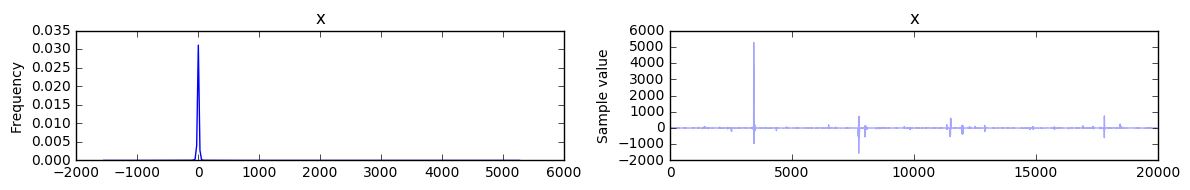

In [3]:
# generate some data
with pm.Model() as model:
    x = pm.Cauchy(name='x', alpha=0, beta=1)
    trace = pm.sample(20000)
    pm.traceplot(trace)
sampledat = trace['x']

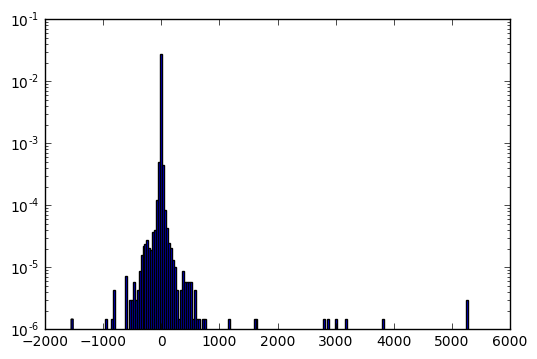

In [4]:
trace.varnames, trace['x']
plt.hist(sampledat, 200, normed=True);
plt.yscale('log');

In [5]:
np.random.randint(0, len(sampledat), 10)

array([ 4385,  5626,  8189,  8298,  6277, 13534,   790,  4567,  7250,  1430])

In [39]:
# generate some data
bins = np.linspace(-4,4,100)
hists = {}
stats = {}
for npts in tqdm.tqdm_notebook(range(1,102,40)):
    d1 = sampledat[np.random.randint(0, len(sampledat), npts)]
    with pm.Model() as model:
        alpha = pm.Uniform('loc', -10, 10)
        #     beta = pm.Uniform('dist', 1, 1)
        x = pm.Cauchy(name='x', alpha=alpha, beta=1, observed=d1)
        trace = pm.sample(10000)
        hists[npts] = np.histogram(trace['loc'], bins)
        stats[npts] = np.percentile(trace['loc'], (1, 5, 25, 50, 75, 95, 99))

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -3.2039: 100%|██████████| 200000/200000 [00:14<00:00, 13398.22it/s]
Finished [100%]: Average ELBO = -3.1956
100%|██████████| 10000/10000 [00:04<00:00, 2206.60it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -109.17: 100%|██████████| 200000/200000 [00:15<00:00, 12761.08it/s]
Finished [100%]: Average ELBO = -109.17
100%|██████████| 10000/10000 [00:04<00:00, 2468.33it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -207.42: 100%|██████████| 200000/200000 [00:15<00:00, 12584.75it/s]
Finished [100%]: Average ELBO = -207.42
100%|██████████| 10000/10000 [00:04<00:00, 2425.20it/s]

1 [ 2.61273059  3.5242216   4.41083455] 1.95996542868
41 [-0.45452378 -0.31245537 -0.17560623] -1.12024281039
81 [-0.28694114 -0.178261   -0.07129927] -0.82665302414


(-2, 2)

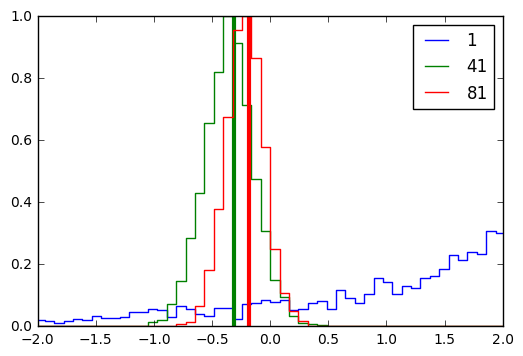

In [40]:
keys = sorted(list(hists.keys()))
for k in keys:
    p = plt.plot(tb.bin_edges_to_center(bins), hists[k][0]/np.max(hists[k][0]), 
                 drawstyle='steps', label=str(k), lw=1)
    c = p[0].get_color()
    plt.axvline(stats[k][3], lw=3, color=c)
    print(k, stats[k][2:5], stats[k][3]/(stats[k][4]-stats[k][2]), )
plt.legend()
plt.xlim((-2,2))

## if both are unknown

In [65]:
# generate some data
bins = np.linspace(-4,4,100)
hists2 = {}
stats2 = {}
hists2d = {}
binsd = np.linspace(0.1,5,100)
for npts in tqdm.tqdm_notebook((1,2,5,10,20,40,60,80,200)):
    d1 = sampledat[np.random.randint(0, len(sampledat), npts)]
    with pm.Model() as model:
        alpha = pm.Uniform('loc', -10, 10)
        beta = pm.Uniform('dist', 0.1, 5)
        x = pm.Cauchy(name='x', alpha=alpha, beta=beta, observed=d1)
        trace = pm.sample(10000)
        hists2[npts] = np.histogram(trace['loc'], bins)
        stats2[npts] = np.percentile(trace['loc'], (1, 5, 25, 50, 75, 95, 99))
        hists2d[npts] = np.histogram2d(trace['loc'], trace['dist'], bins=(bins, binsd))

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -3.4148: 100%|██████████| 200000/200000 [00:19<00:00, 10359.13it/s]
Finished [100%]: Average ELBO = -3.4133
100%|██████████| 10000/10000 [00:16<00:00, 589.27it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -6.0271: 100%|██████████| 200000/200000 [00:21<00:00, 9401.12it/s] 
Finished [100%]: Average ELBO = -6.0302
100%|██████████| 10000/10000 [00:16<00:00, 593.52it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -17.514: 100%|██████████| 200000/200000 [00:23<00:00, 8638.76it/s] 
Finished [100%]: Average ELBO = -17.498
100%|██████████| 10000/10000 [00:14<00:00, 710.92it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -30.586: 100%|██████████| 200000/200000 [00:20<00:00, 9937.13it/s] 
Finished [100%]: Average ELBO = -30.579
100%|██████████| 10000/10000 [00:10<00:00, 925.37it/s]
Auto-assigning NUTS sampler...
Initi

1 [-0.02732777  1.7986982   3.33797072] 0.534484001265
2 [-0.51222811  0.42793596  1.34765365] 0.230087723241
5 [-0.77572329 -0.32155577  0.25600368] -0.311667503672
10 [-0.16492586  0.22270658  0.60205905] 0.290366305916
20 [-0.29019251 -0.08846861  0.09719981] -0.22836954948
40 [-0.18274798 -0.05376047  0.07095087] -0.211906620458
60 [-0.08303182  0.03846568  0.16156505] 0.157261539298
80 [-0.21916693 -0.12437386 -0.02976062] -0.656651117067
200 [-0.04601504  0.01077252  0.06673112] 0.0955466312146


(-2, 2)

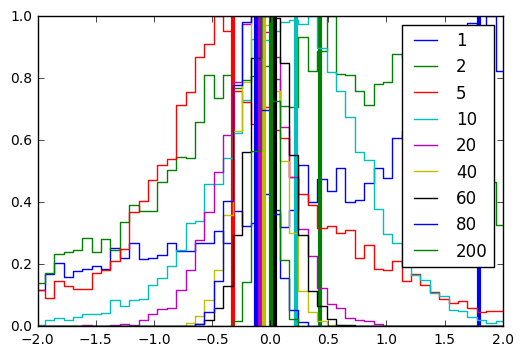

In [66]:
keys = sorted(list(hists2.keys()))
for k in keys:
    p = plt.plot(tb.bin_edges_to_center(bins), hists2[k][0]/np.max(hists2[k][0]), 
                 drawstyle='steps', label=str(k), lw=1)
    c = p[0].get_color()
    plt.axvline(stats2[k][3], lw=3, color=c)
    print(k, stats2[k][2:5], stats2[k][3]/(stats2[k][4]-stats2[k][2]), )
plt.legend()
plt.xlim((-2,2))

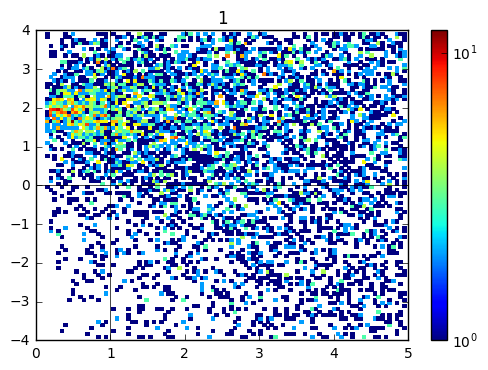

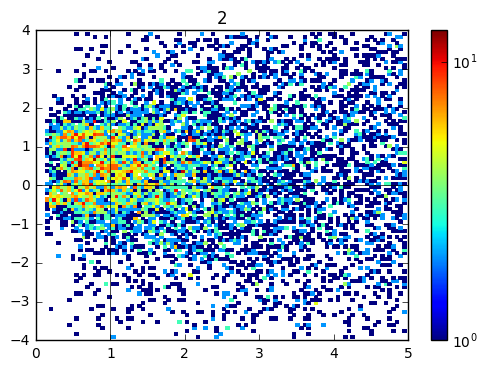

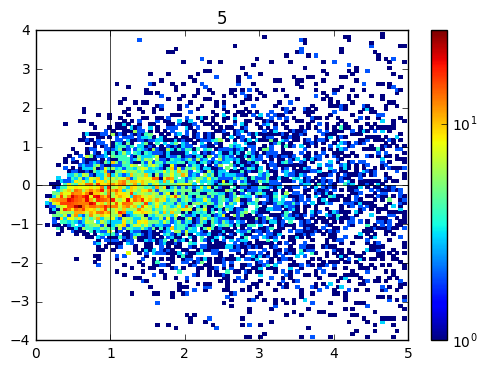

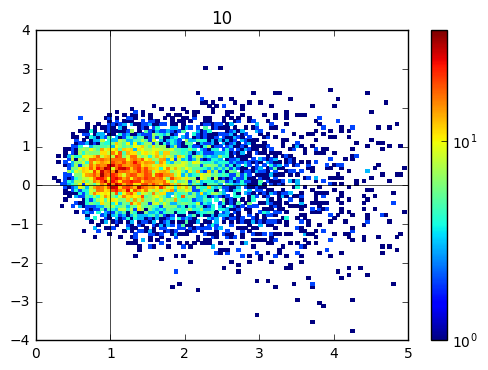

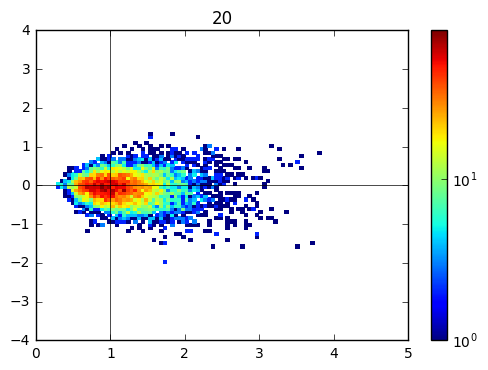

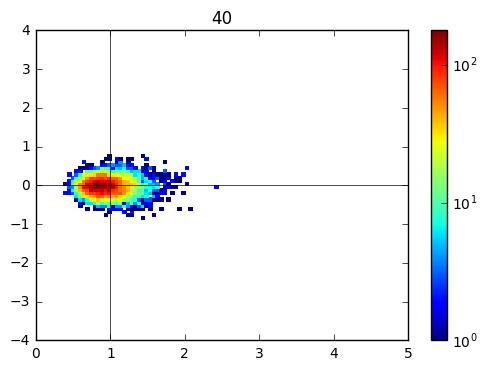

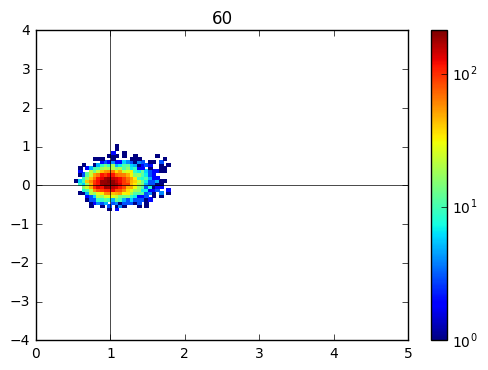

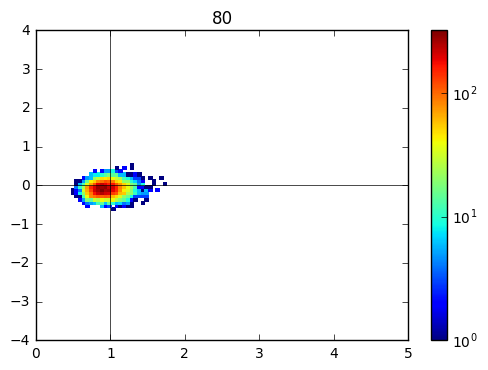

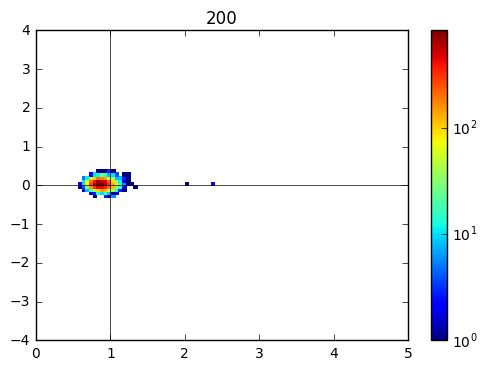

In [69]:
# plt.contour(hists2d[1][0], 5)
from matplotlib.colors import LogNorm

keys = sorted(list(hists2.keys()))
for k in keys:
    plt.figure()
    plt.pcolormesh(tb.bin_edges_to_center(binsd), 
                   tb.bin_edges_to_center(bins),
                   hists2d[k][0], 
                   norm=LogNorm())
    plt.title(str(k))
    plt.colorbar()
    plt.axvline(1, lw=0.5, c='k')
    plt.axhline(0, lw=0.5, c='k')